In [45]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


### Load the Dataset

In [46]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [47]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#Explore the data

In [48]:
train_images.shape

(60000, 28, 28)

In [51]:
train_labels


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

#Preprocess the data

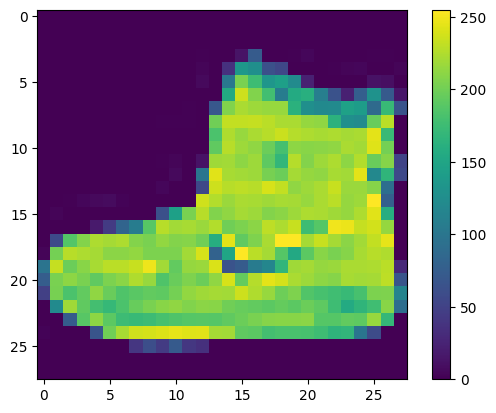

In [52]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [53]:
train_images = train_images / 255.0

test_images = test_images / 255.0

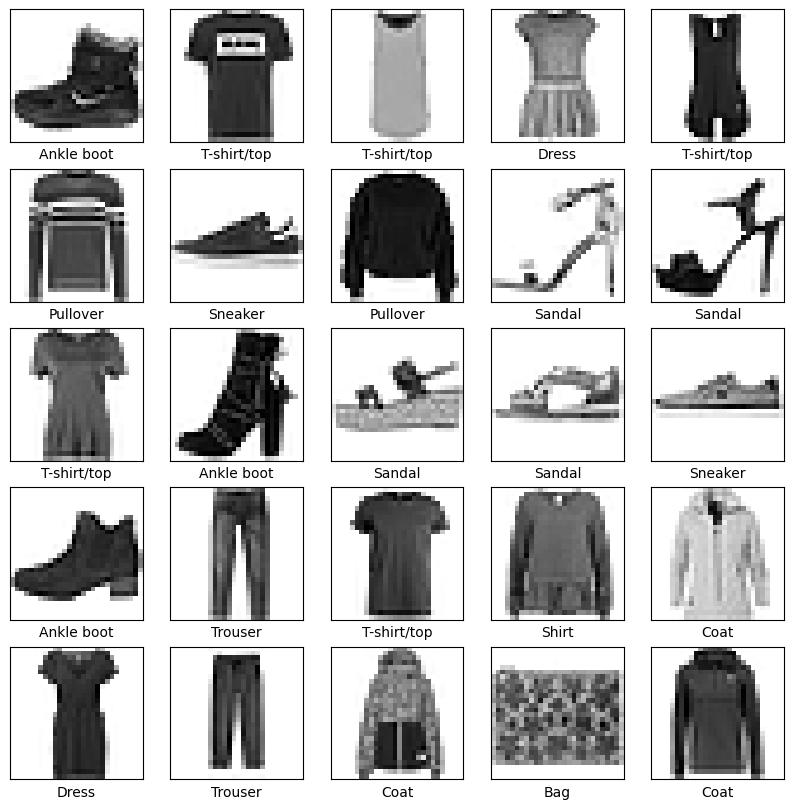

In [54]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

#Build the model

In [55]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

Bu kod, TensorFlow ile bir sinir ağı modeli oluşturmak için kullanılan bir örnektir. Sinir ağı, MNIST kıyafetleri tanımak için eğitilecektir.

Model, tf.keras.Sequential sınıfından bir örnek oluşturarak başlar. Sequential sınıfı, ardışık olarak birbirine bağlı katmanları tanımlamak için kullanılır. Bu modelde, iki yoğun katman ve bir düzleştirme katmanı yer alır.

İlk katman, Flatten katmanıdır. Bu katman, girdi verilerini düzleştirir. Veri setindeki her bir görüntü, 28x28 piksel boyutundadır, bu nedenle girdi şekli (28,28)'dir. Flatten katmanı, bu 28x28 boyutlu girdileri tek bir sütun vektörüne dönüştürür.

İkinci katman, Dense katmanıdır. Bu katman, 128 nörona sahip bir yoğun katmandır. Bu katmanda, aktivasyon fonksiyonu olarak ReLU kullanılmaktadır.

Üçüncü ve son katman da bir yoğun katmandır, ancak bu kez sadece 10 nörona sahiptir. Bu katmanın aktivasyon fonksiyonu belirtilmemiş, yani bu katmanın çıktıları doğrudan kullanılabilir.

Bu model, 10 farklı sınıf için olası çıktılar üretecektir (0'dan 9'a kadar rakamlar). Bu nedenle son katmandaki 10 nöron, her sınıf için bir çıktıyı temsil eder.

Bu model, daha sonra MNIST veri kümesindeki görüntüleri ve etiketleri kullanarak eğitilebilir.

#Compile the model

In [56]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


Bu kod, TensorFlow'da derin öğrenme modelini derlemek için kullanılan bir örnektir. Derleme aşaması, modelin öğrenme sürecinde kullanacağı kayıp fonksiyonu, optimizasyon algoritması ve performans ölçütlerinin belirlendiği aşamadır.

compile() fonksiyonu, TensorFlow modellerini derlemek için kullanılır. Bu fonksiyon, bir optimizasyon algoritması, kayıp fonksiyonu ve bir veya daha fazla performans ölçütü belirtir.

Bu örnekte, optimizer='adam' parametresi, modelin eğitimi sırasında kullanılacak optimizasyon algoritmasını belirler. 'adam', adaptif momentum algoritmasını kullanır ve derin öğrenme modelleri için popüler bir seçenektir.

loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) parametresi, kayıp fonksiyonunu belirtir. Bu modelde, Sparse Categorical Crossentropy kullanılmaktadır. Bu fonksiyon, çok sınıflı sınıflandırma problemleri için bir kayıp fonksiyonudur ve bu modelde 10 farklı sınıf için olası çıktılar olduğundan kullanılmaktadır. from_logits=True parametresi, modelin çıktılarından önce softmax aktivasyon fonksiyonunu uygulamadan önce doğrudan son katmandan gelen çıktıları alır.

metrics=['accuracy'] parametresi, modelin performansını ölçmek için kullanılacak ölçütleri belirtir. Bu modelde, sınıflandırma doğruluğu ölçütü kullanılmaktadır.

Bir kez derlenen model, eğitim verileri üzerinde fit() fonksiyonu çağrılarak eğitilebilir.

#Train the model

In [57]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 4ms/step - loss: 0.5049 - accuracy: 0.8218
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3770 - accuracy: 0.8652
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3374 - accuracy: 0.8769
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3120 - accuracy: 0.8856
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2960 - accuracy: 0.8910
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2811 - accuracy: 0.8963
Epoch 7/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2694 - accuracy: 0.9005
Epoch 8/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2578 - accuracy: 0.9052
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2487 - accuracy: 0.9072
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.24

Bu kod, TensorFlow'da bir sinir ağı modelini eğitmek için kullanılan bir örnektir.

fit() fonksiyonu, modelin eğitim verileri üzerinde eğitilmesini sağlar. Bu fonksiyon, eğitim verileri, hedef etiketler (labels) ve eğitim sürecinde kullanılacak diğer parametreler gibi gerekli girdileri alır.

Bu örnekte, train_images ve train_labels parametreleri, modelin eğitim verilerini temsil eder. epochs=10 parametresi, modelin eğitim verilerini kaç turda eğitmesi gerektiğini belirtir. Bu örnekte, model 10 tur boyunca eğitilecek.

Eğitim sırasında, model, belirtilen sayıda tur boyunca verileri işleyerek öğrenir. Her bir turda, model eğitim verilerinin bir parçasını alır, ardından bu verileri kullanarak tahminler yapar ve hedef etiketlerle karşılaştırır. Tahminler ile hedef etiketler arasındaki farkın azaltılması için modeldeki ağırlıklar güncellenir.

Eğitim süreci tamamlandıktan sonra, model, test verileri üzerinde doğruluk oranını değerlendirmek için kullanılabilir. evaluate() fonksiyonu, modelin test verileri üzerindeki performansını değerlendirmek için kullanılabilir.

#Evaluate accuracy

In [58]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3440 - accuracy: 0.8806 - 1s/epoch - 4ms/step

Test accuracy: 0.8805999755859375


#Make predictions

In [59]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [60]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 2s 6ms/step


In [61]:
predictions[0]


array([1.3506593e-06, 1.4265001e-08, 1.2318180e-09, 7.8238847e-09,
       4.9426924e-10, 6.7488960e-05, 1.7281120e-05, 5.2522428e-02,
       2.5214044e-07, 9.4739115e-01], dtype=float32)

In [62]:
np.argmax(predictions[0])

9

In [63]:
test_labels[0]

9

In [64]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

#Verify predictions

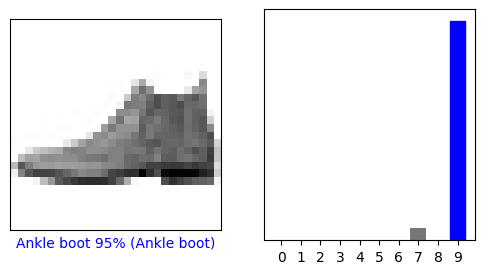

In [66]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

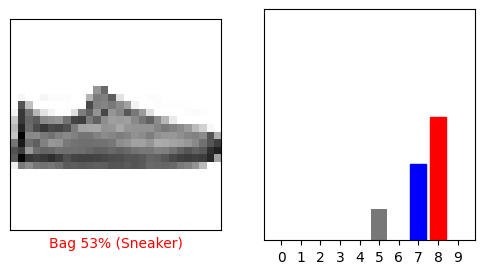

In [67]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

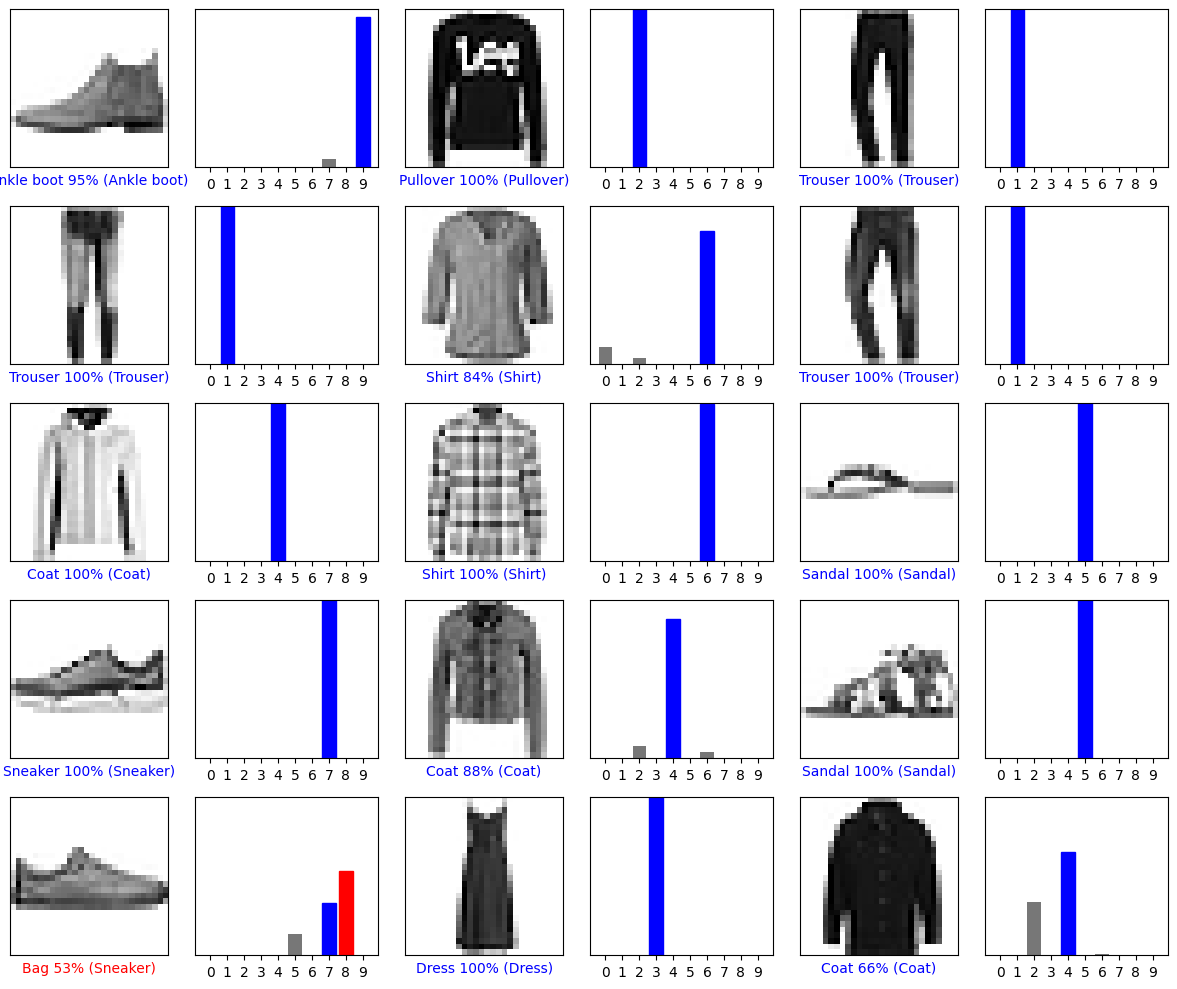

In [68]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

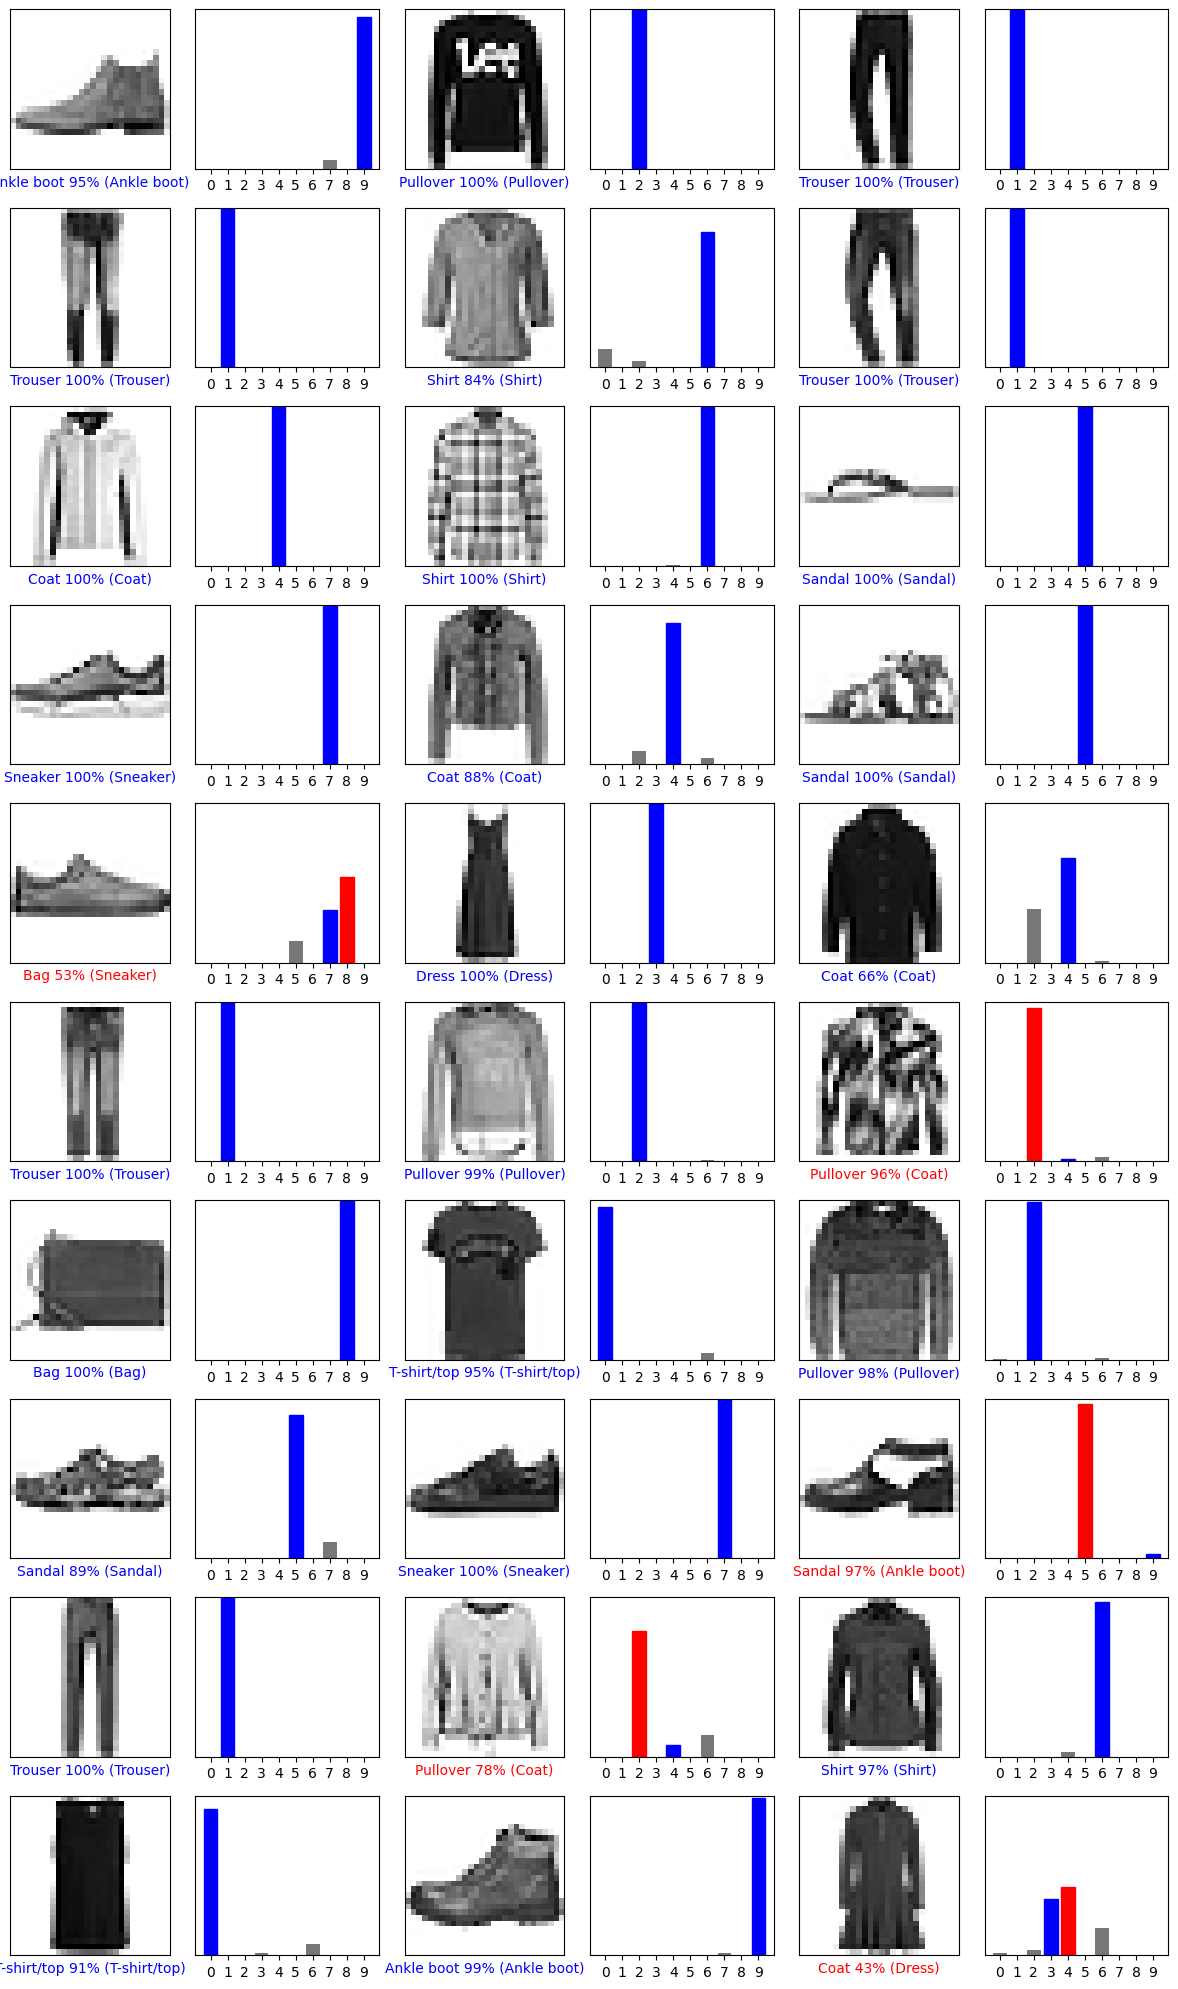

In [75]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 10
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

#Use the trained model

In [69]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [70]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [71]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 46ms/step
[[6.9073508e-06 4.7390199e-12 9.9954873e-01 3.0655617e-14 4.1042702e-04
  5.9522075e-16 3.3965014e-05 3.8084045e-15 1.9657999e-13 1.4908337e-17]]


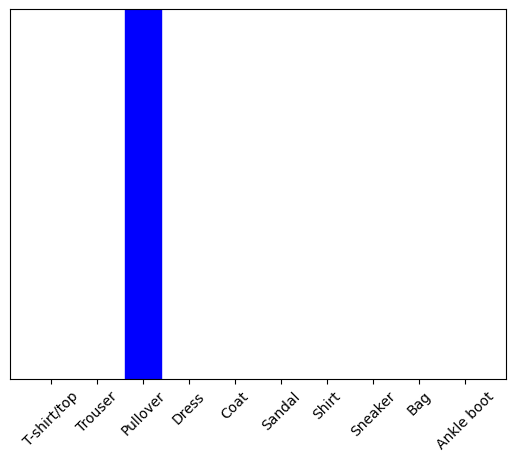

In [72]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [73]:
np.argmax(predictions_single[0])

2